Question 5: Programming (40 points):
Use decision tree and random forest to train the titanic.csv dataset included in the assignment

In [87]:
import pandas as pd
import pydotplus as pyd
from IPython.display import Image  
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [88]:
df = pd.read_csv("titanic.csv")

In [89]:
df.drop(df.columns[[0]], axis=1, inplace=True)
print(df.head())

  pclass  survived                             name     sex      age  sibsp  \
0    1st         1    Allen, Miss. Elisabeth Walton  female  29.0000      0   
1    1st         1   Allison, Master. Hudson Trevor    male   0.9167      1   
2    1st         0     Allison, Miss. Helen Loraine  female   2.0000      1   
3    1st         0  Allison, Mr. Hudson Joshua Crei    male  30.0000      1   
4    1st         0  Allison, Mrs. Hudson J C (Bessi  female  25.0000      1   

   parch  ticket        fare    cabin     embarked boat   body  \
0      0   24160  211.337494       B5  Southampton    2    NaN   
1      2  113781  151.550003  C22 C26  Southampton   11    NaN   
2      2  113781  151.550003  C22 C26  Southampton  NaN    NaN   
3      2  113781  151.550003  C22 C26  Southampton  NaN  135.0   
4      2  113781  151.550003  C22 C26  Southampton  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ /

Step 1: : Read in Titanic.csv and observe a few samples, some features are categorical, and 
others are numerical. If some features are missing, fill them in using the average of the same 
feature of other samples. Take a random 80% samples for training and the rest 20% for test

In [90]:
df = df.drop(["name","parch","ticket","fare","cabin","embarked","boat","body","home.dest"], axis=1)
df["pclass"]=df["pclass"].map({"1st":1,"2nd":2,"3rd":3})
df["sex"]=df["sex"].map({"female":1,"male":0})
df["age"].fillna((df["age"].mean()),inplace=True)
df= df.dropna()
df.head()

,pclass,survived,sex,age,sibsp
0,1,1,1,29.0000,0
1,1,1,0,0.9167,1
2,1,0,1,2.0000,1
3,1,0,0,30.0000,1
4,1,0,1,25.0000,1


In [91]:
X=df.drop(["survived"],axis=1)
y=df["survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

Step 2: : Fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and 
dependent variable ‘survived’. Plot the full tree. Make sure ‘survived’ is a qualitative variable 
taking 1 (yes) or 0 (no) in your code. You may see a tree similar to this one (the actual structure 
and size of your tree can be different):

In [92]:
def confusion_mat(confusion):
    TN = confusion[0][0]
    FN = confusion[1][0]
    TP = confusion[1][1]
    FP = confusion[0][1]
    sensitive_test = TP/(TP+FN)*100
    specific_test = TN/(FP+TN)*100
    return sensitive_test,specific_test

In [93]:
DT = DecisionTreeClassifier()

DT_model = DT.fit(X_train, y_train)

y_pred = DT_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sensitive_test,specific_test= confusion_mat(cm)

print("Percentage of survivors before pruning correctly predicted (on test set) = ", round(sensitive_test,4))
print("Percentage of fatalities before pruning correctly predicted (on test set) = ", round(specific_test,4))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.80       144
           1       0.81      0.58      0.68       118

    accuracy                           0.75       262
   macro avg       0.77      0.74      0.74       262
weighted avg       0.76      0.75      0.74       262

Percentage of survivors before pruning correctly predicted (on test set) =  58.4746
Percentage of fatalities before pruning correctly predicted (on test set) =  88.8889


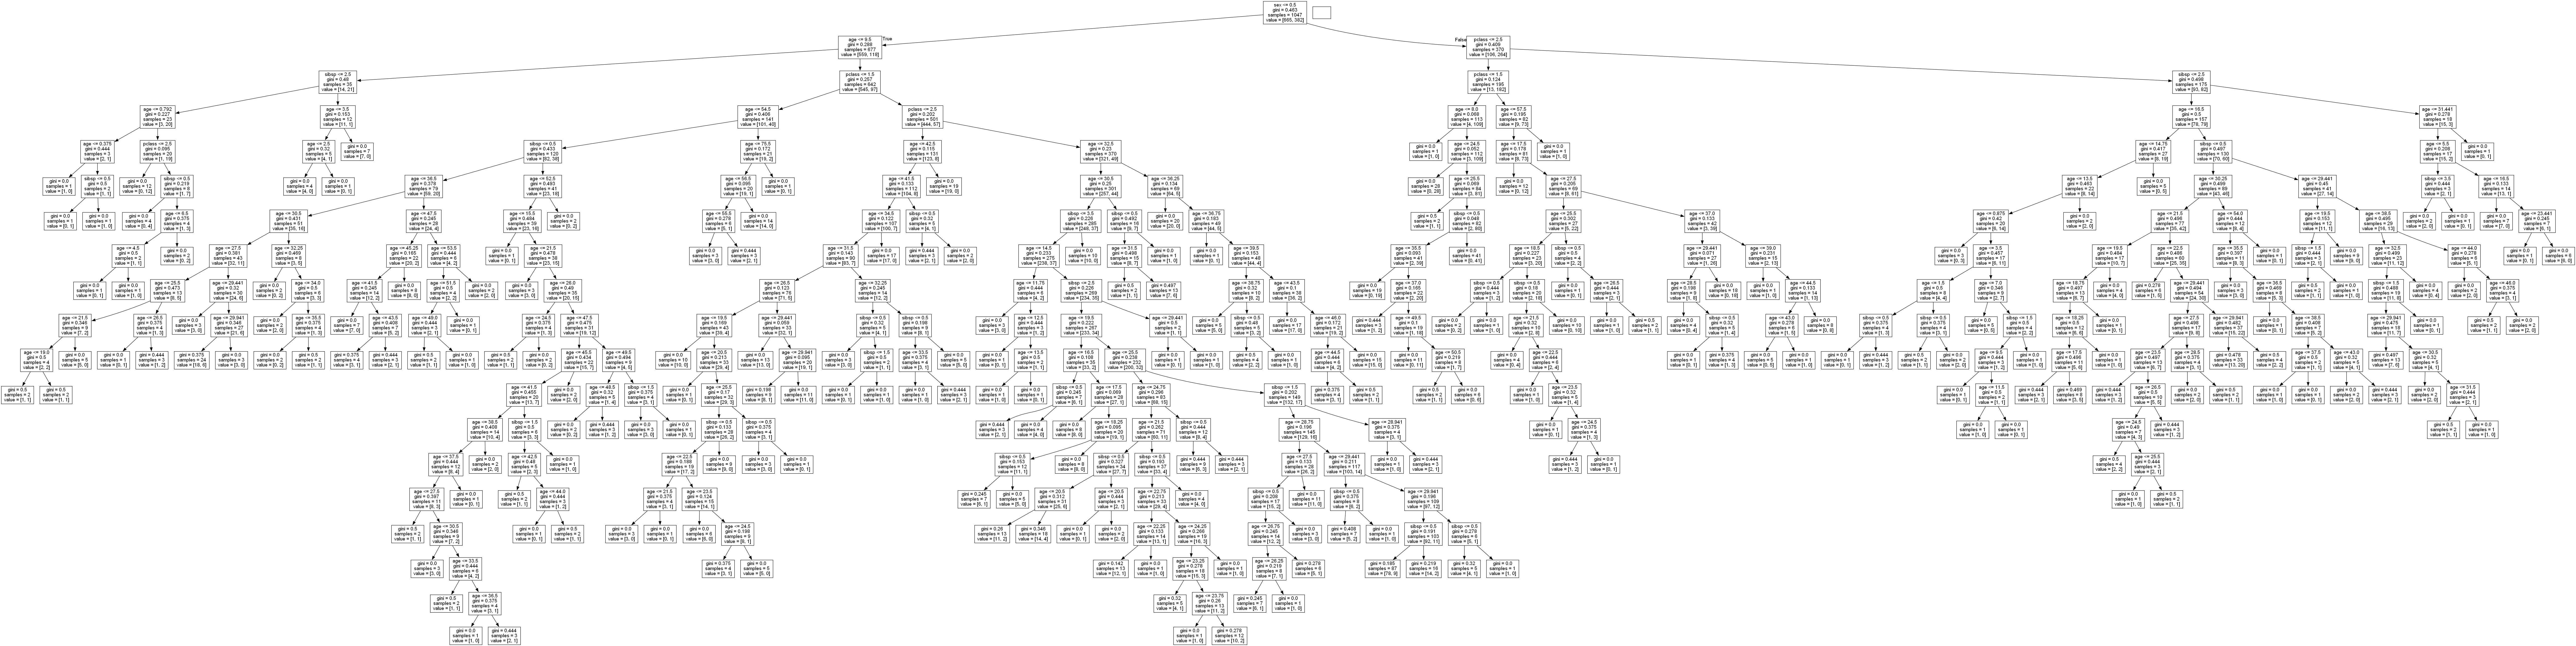

In [94]:
# Plotting Graph for Decision Tree
data = export_graphviz(DT, out_file=None,feature_names=X_train.columns)
graph = pyd.graph_from_dot_data(data)
Image(graph.create_png())

Step 3: Use the GridSearchCV() function to find the best parameter max_leaf_nodes to prune the 
tree. Plot the pruned tree which shall be smaller than the tree you obtained in Step 2. 

In [95]:
params = {'max_leaf_nodes': range(2,150)}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=10)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': range(2, 150)})

In [96]:
print("Best parameters set found on Training set: ", grid_search_cv.best_params_)

Best parameters set found on Training set:  {'max_leaf_nodes': 5}


Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.97      0.81       144
           1       0.93      0.47      0.62       118

    accuracy                           0.74       262
   macro avg       0.81      0.72      0.71       262
weighted avg       0.80      0.74      0.72       262



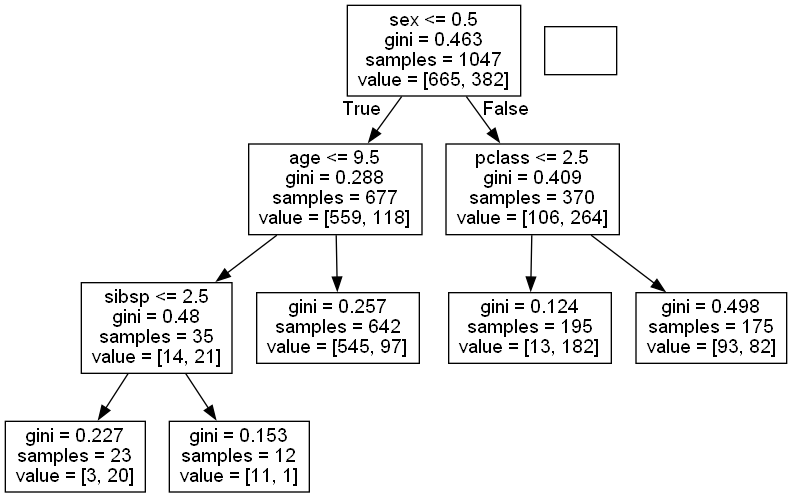

In [97]:
DT_clf = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=5)
DT_clf = DT_clf.fit(X_train, y_train)

y_pred = DT_clf.predict(X_test)
print("Classification Report:\n",classification_report(y_test, y_pred))

graph_data = export_graphviz(DT_clf, out_file=None,feature_names=X_train.columns)
graph = pyd.graph_from_dot_data(graph_data)
Image(graph.create_png())


Step 4: For the pruned tree, report its accuracy on the test set for the following:
percent survivors correctly predicted (on test set)
percent fatalities correctly predicted (on test set)

In [98]:
cm = confusion_matrix(y_test, y_pred)
sensitive_test,specific_test= confusion_mat(cm)
print("Percentage of survivors after pruning correctly predicted (on test set) = ", round(sensitive_test,4))
print("Percentage of fatalities after pruning correctly predicted (on test set) = ", round(specific_test,4))

Percentage of survivors after pruning correctly predicted (on test set) =  46.6102
Percentage of fatalities after pruning correctly predicted (on test set) =  97.2222


Step 5: Use the RandomForestClassifier() function to train a random forest using the value of 
max_leaf_nodes you found in Step 3. You can set n_estimators as 50. Report the accuracy of 
random forest on the test set for the following:
percent survivors correctly predicted (on test set)
percent fatalities correctly predicted (on test set)

In [99]:
RF_clf = RandomForestClassifier(n_estimators=50, random_state=42,max_leaf_nodes=5)
RF_clf = RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sensitive_test,specific_test= confusion_mat(cm)
print("Using Random Forest, percentage of survivors correctly predicted (on test set) = ", round(sensitive_test,4))
print("Using Random Forest, percentage of fatalities correctly predicted (on test set) = ", round(specific_test,4))

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.97      0.80       144
           1       0.91      0.45      0.60       118

    accuracy                           0.73       262
   macro avg       0.80      0.71      0.70       262
weighted avg       0.79      0.73      0.71       262

Using Random Forest, percentage of survivors correctly predicted (on test set) =  44.9153
Using Random Forest, percentage of fatalities correctly predicted (on test set) =  96.5278


Check whether there is improvement as compared to a single tree obtained in Step 4.

In [100]:
print("After getting most optimum number of leaf node = 5 then making observations on computed accurary recieved from both Random Forest and Decision Tree! \n Accuracy of Decision tree is better then accuracy of Random Forest for the model which we had trained!")

After getting most optimum number of leaf node = 5 then making observations on computed accurary recieved from both Random Forest and Decision Tree! 
 Accuracy of Decision tree is better then accuracy of Random Forest for the model which we had trained!
